<a href="https://colab.research.google.com/github/sanjaymkr/cardiovascular-risk-prediction/blob/main/Cardiovascular_Risk_Prediction_Sanjay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> <u>Problem Statement</u></b>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.

The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD).

The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
**Variables:**

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# <b> <u>Variable Description</u></b>

**Demographic:**
*  **Sex**: male or female("M" or "F")

*  **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
* **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
* **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**
* **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)
* **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)
* **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)
* **Diabetes**: whether or not the patient had diabetes (Nominal)

**Medical(current)**
* **Tot Chol**: total cholesterol level (Continuous)
* **Sys BP**: systolic blood pressure (Continuous)
* **Dia BP**: diastolic blood pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* **Glucose**: glucose level (Continuous)

**Predict variable (desired target)**
* **10-year risk of coronary heart disease CHD**(binary: “1”, means “Yes”, “0” means “No”) -DV

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import math
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn import ensemble
from xgboost import XGBClassifier

##Reading the Data


In [4]:
df= pd.read_csv("/content/data_cardiovascular_risk.csv")

In [5]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

##Data prepreocessing and basic EDA

**Missing Value Analysis** 

 Handling missing data is important as many machine learning algorithms do not support data with missing values.
 

In [7]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

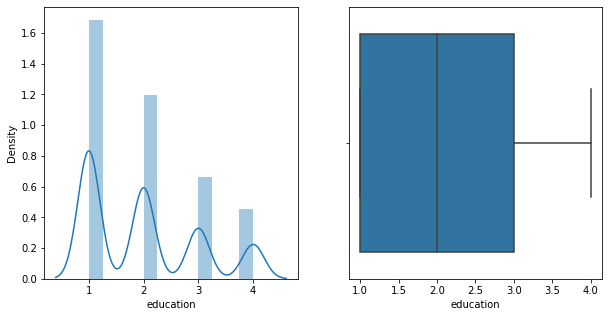

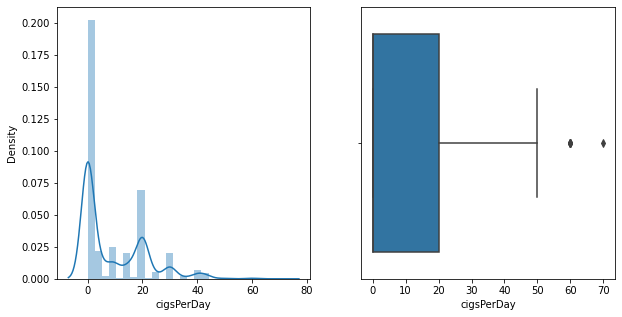

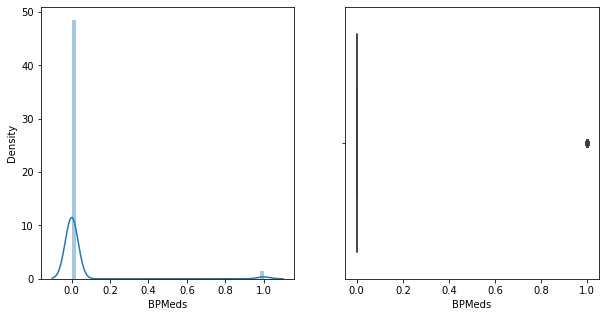

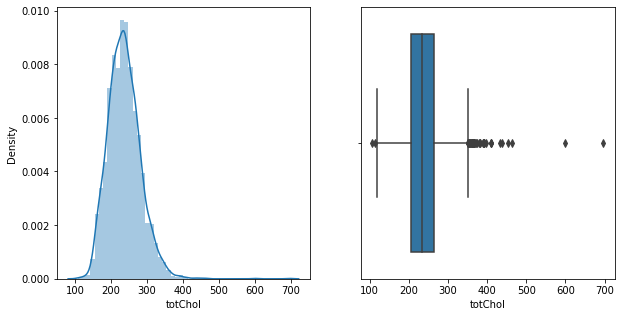

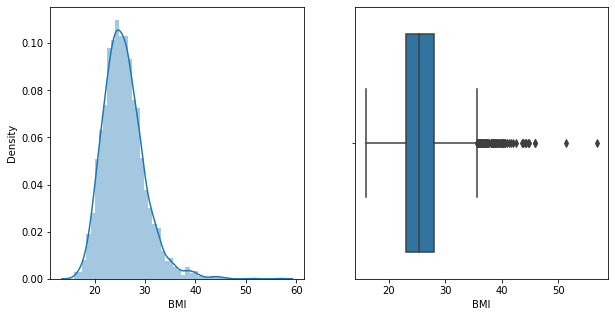

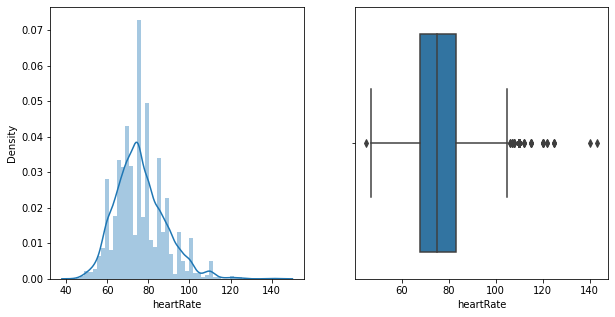

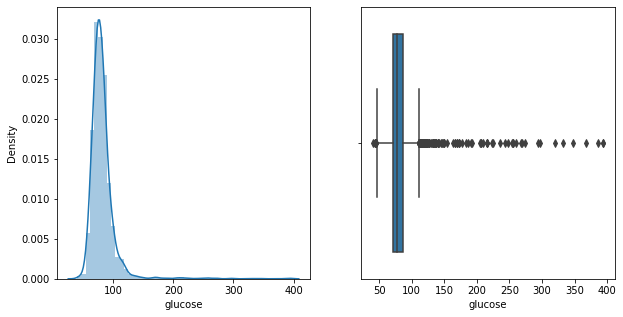

In [8]:
for  i in ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']:
  fig, axes = plt.subplots(1,2,figsize=(10,5))
  sns.distplot(df[i], ax=axes[0])
  sns.boxplot(df[i], ax=axes[1])

In [9]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
for  i in ['education', 'totChol', 'BMI', 'heartRate', 'glucose']:
  df[i] = df[i].fillna(df[i].median())

In [11]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(10)
df['BPMeds'] = df['BPMeds'].fillna(0)

In [12]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


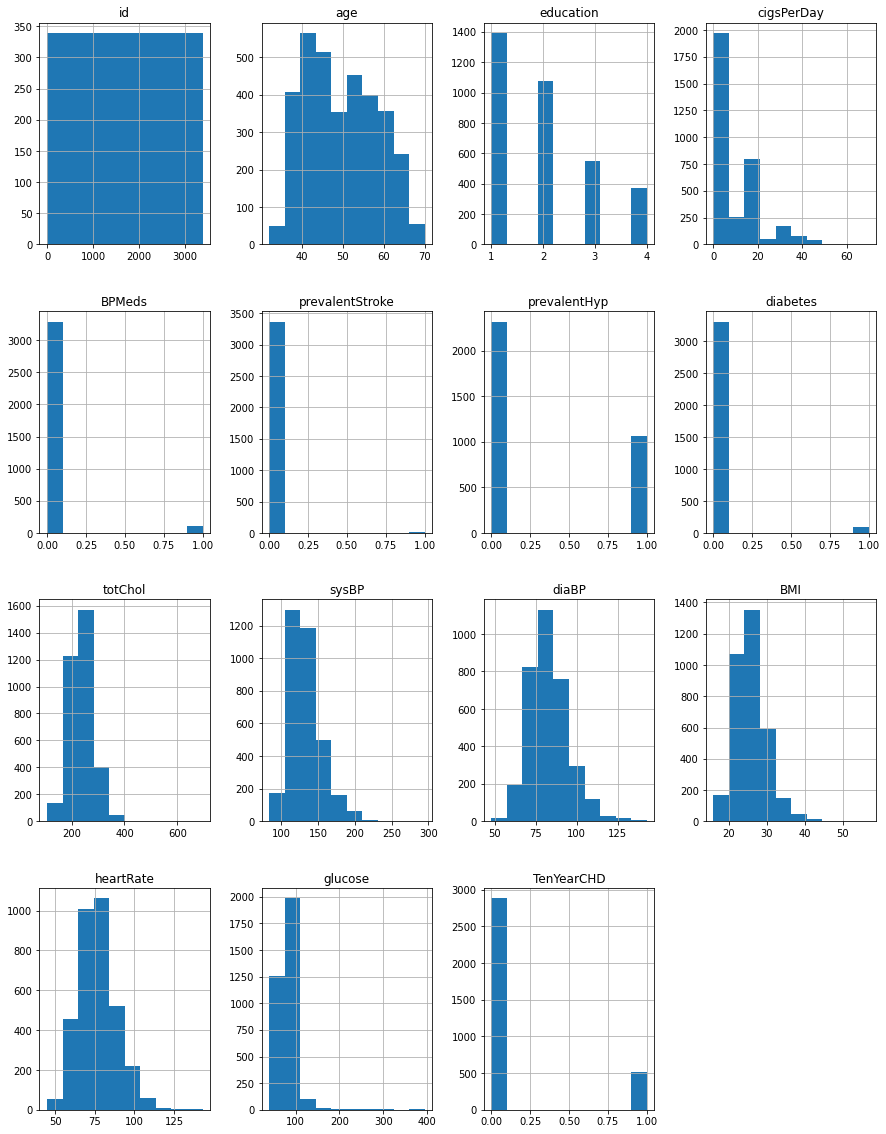

In [13]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

From above distribution plot we can say that the data on the **prevalent stroke**, **diabetes**, and **blood pressure** meds are poorly balanced.


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

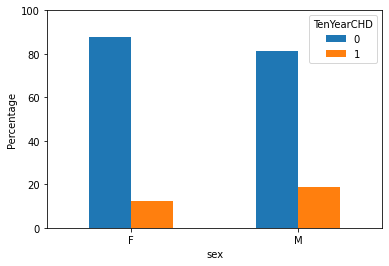

In [14]:
freq_df = df.groupby('TenYearCHD')['sex'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

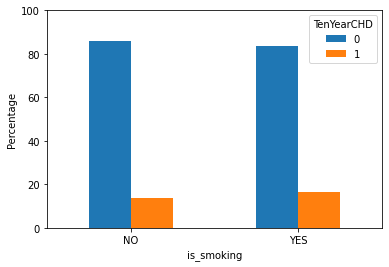

In [15]:
#smoking
freq_df = df.groupby('TenYearCHD')['is_smoking'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

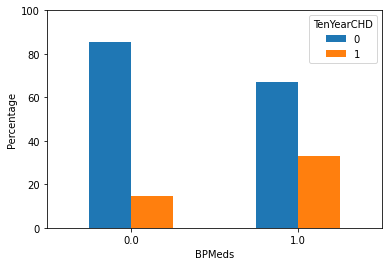

In [16]:
#BPmeds
freq_df = df.groupby('TenYearCHD')['BPMeds'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

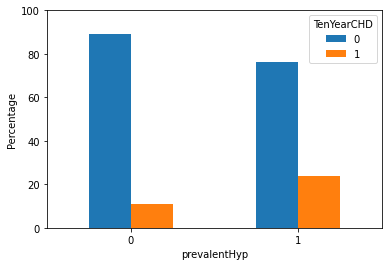

In [17]:
#precalenthyp
freq_df = df.groupby('TenYearCHD')['prevalentHyp'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

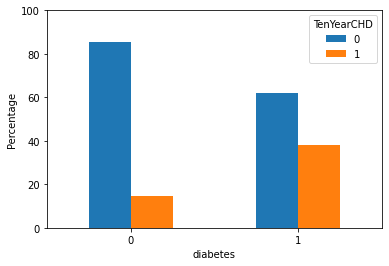

In [18]:
#diabetes
freq_df = df.groupby('TenYearCHD')['diabetes'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


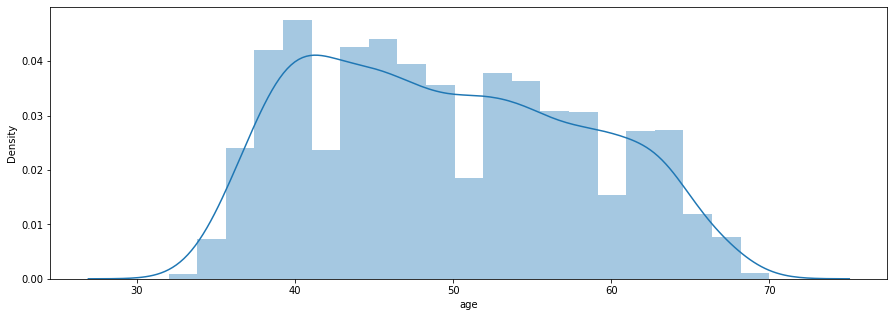

In [19]:
fig, axes = plt.subplots(1,figsize=(15,5))
sns.distplot(df['age'])

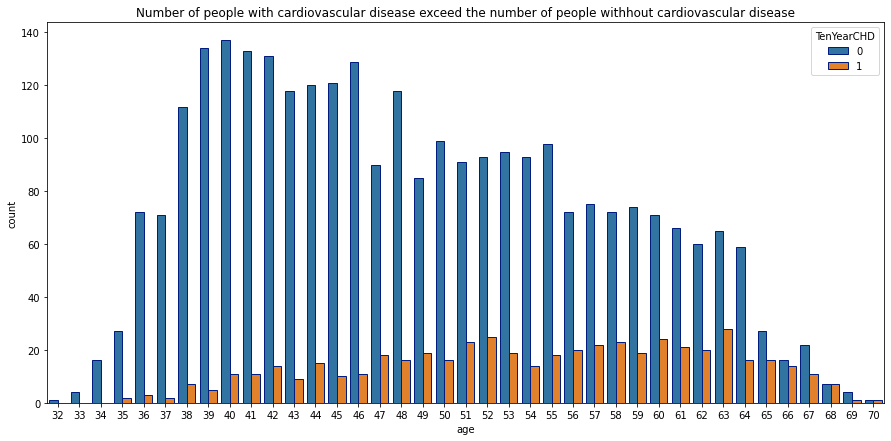

In [20]:
# Visualising the target and age variable
plt.figure(figsize=[15,7])
plt.title("Number of people with cardiovascular disease exceed the number of people withhout cardiovascular disease")
sns.countplot(x='age', hue='TenYearCHD', data=df, edgecolor=sns.color_palette('dark', n_colors=1))

As we can see in above plot The people with the highest risk of developing heart disease are betwwen the ages of **51 and 63.**

Because the number of sick people generally increases with age.

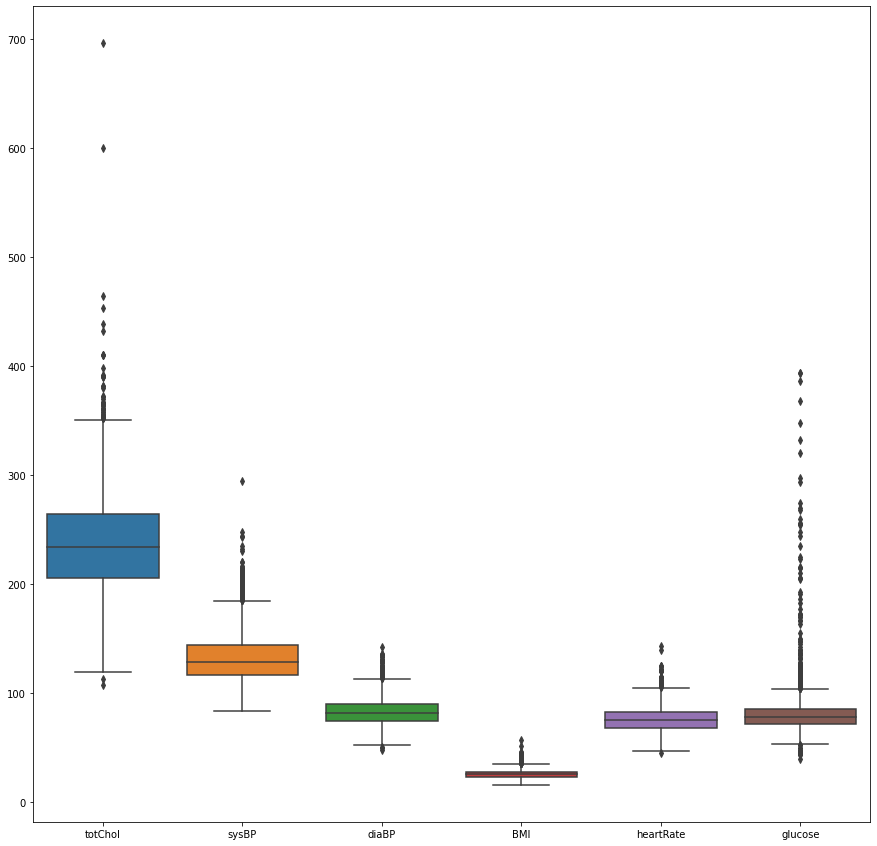

In [21]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df[['totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']])

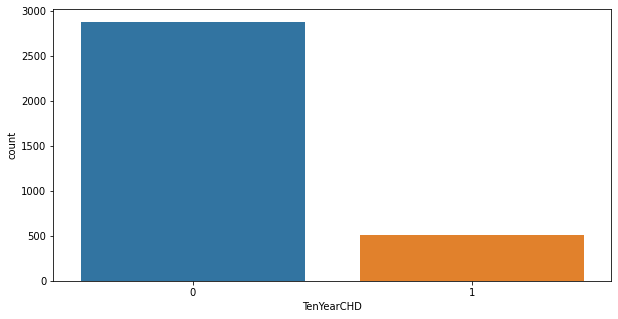

In [22]:
#looking for our target variable
plt.figure(figsize=(10,5))
sns.countplot(x='TenYearCHD',data=df)

In [23]:
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [24]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [25]:
# Removing columns such as 'id' & 'education' 
df.drop(['id','education'],axis=1,inplace=True)

 Before we go ahead, an important step to do is to convert our string feature  into an integer.
 
  We will name 

*   In **sex** feature  **M** will be converted to 1 and **F** will be converted to 0.
*   In **is_smoking** feature  **YES** will be converted to 1 and **NO** will be converted to 0.


In [26]:
# Applying function to convert string data to an integer
df['sex'] = df['sex'].apply(lambda x : 1 if x == "M" else 0)
df['is_smoking'] = df['is_smoking'].apply(lambda x : 1 if x == "YES" else 0)

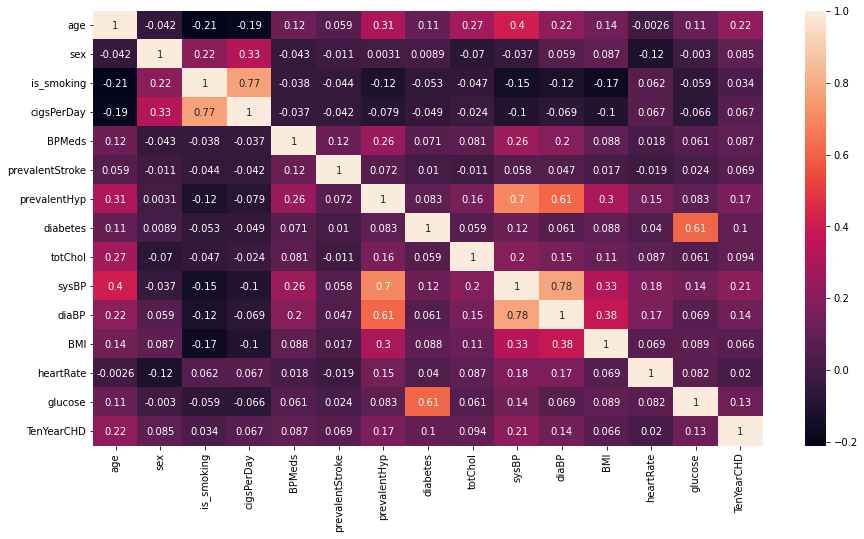

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

**From the above correlation plot we can conclude that**,



*   There are no features with more than 0.5 correlation with the Ten year risk of developing CHD and this shows that the features a poor predictors. However the features with the highest correlations are age, prevalent hypertension(prevalentHyp) and systolic blood pressure(sysBP).

*   Also there are a couple of features that are highly correlated with each other and it makes no sense to use both of them in building a machine learning model. 

**These includes:** 

*  Blood glucose and diabetes;
*  systolic and diastolic blood pressures;
*  cigarette smoking and the number of cigarretes smoked per day. 

Therefore we need to carry out feature selection to pick the best features. 


In [28]:
#define the features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

**Tree-based: SelectFromModel**

**SelectFromModel** is an Embedded method. Embedded methods use algorithms that have built-in feature selection methods.


Here,

We have used RandomForest() to select features based on feature importance.
We calculate feature importance using node impurities in each decision tree. 

In Random forest, the final feature importance is the average of all decision tree feature importance.

In [29]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
# define SelectFromModel feature selection method
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=14)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

7 selected features


In [30]:
# Important or top Features
embeded_rf_feature

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [31]:
# Importing statsmodels 
import statsmodels.api as sm

In [32]:
# Splitting the dependent and independent variables
top_features = df[embeded_rf_feature]
y = df['TenYearCHD']

In [33]:
# Fit the data
result = sm.Logit(y,top_features).fit()
# The summary table below, gives us a descriptive summary about the regression results
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.412827
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3390
Model:                          Logit   Df Residuals:                     3383
Method:                           MLE   Df Model:                            6
Date:                Mon, 29 Aug 2022   Pseudo R-squ.:                 0.02632
Time:                        07:37:44   Log-Likelihood:                -1399.5
converged:                       True   LL-Null:                       -1437.3
Covariance Type:            nonrobust   LLR p-value:                 2.804e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0219      0.006      3.652      0.000       0.010       0.034
totChol       -0.0023      0.

In [34]:
# Checking the odds ratio of top features
params = result.params
conf = result.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                 5%       95%  Odds Ratio
age        1.010194  1.034217    1.022135
totChol    0.995518  0.999922    0.997718
sysBP      1.017860  1.031684    1.024748
diaBP      0.960968  0.984187    0.972508
BMI        0.919783  0.966340    0.942774
heartRate  0.964575  0.979250    0.971885
glucose    1.001715  1.008685    1.005194


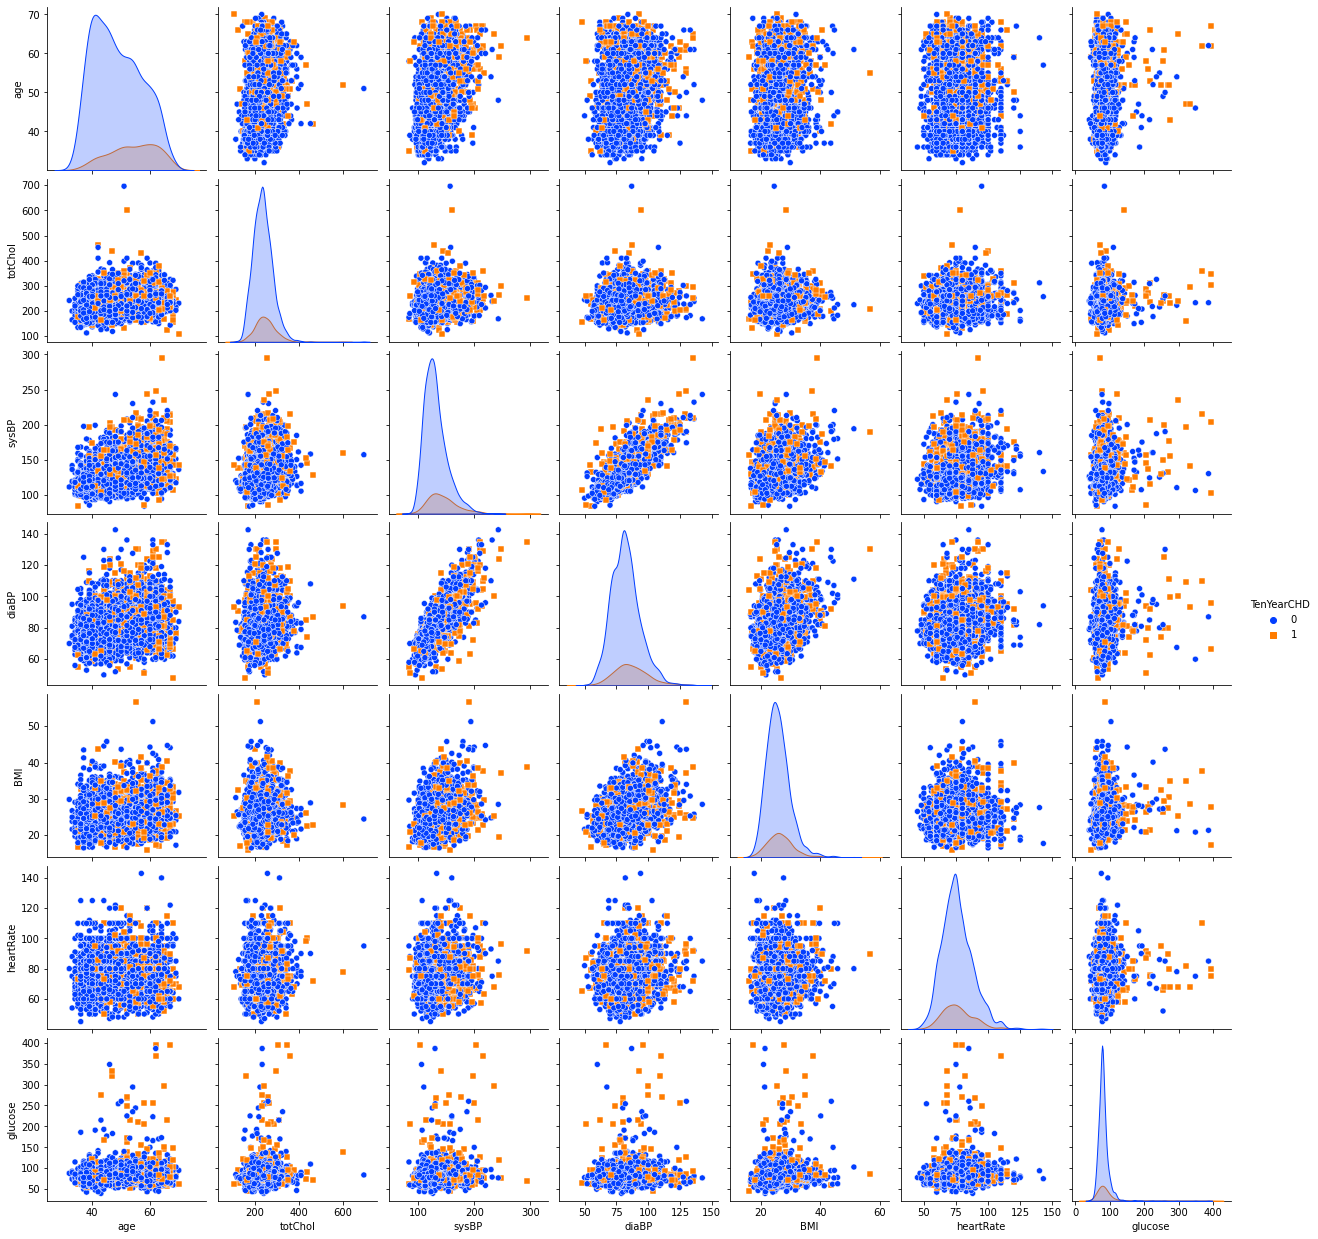

In [35]:
# Plotting pairplot of top features vs target variable
sns.pairplot(df, hue = 'TenYearCHD', markers=["o", "s"], vars = embeded_rf_feature, palette='bright')

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X = df[embeded_rf_feature]
y = df.iloc[:,-1]
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


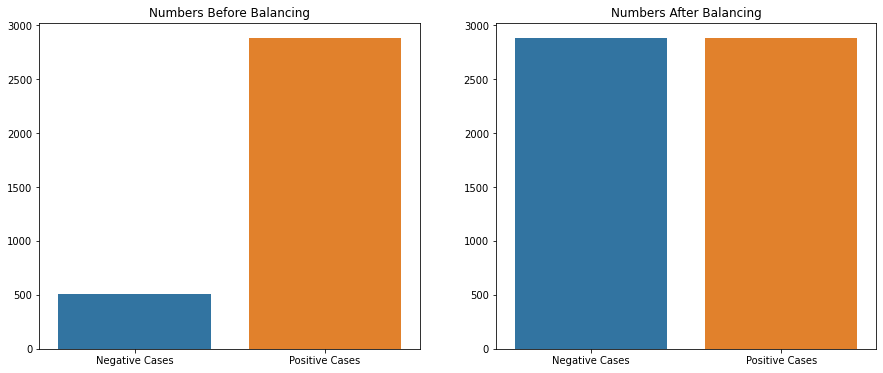

In [37]:
from collections import Counter
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(dict(Counter(y)).values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(dict(Counter(y_smote)).values()))
plt.title("Numbers After Balancing")
plt.show()

As seen after applying SMOTE, the new dataset is much more balanced.

**Splitting the data to Training and Testing set**


In [38]:
# First let's create our new dataset
df_new = pd.concat([pd.DataFrame(x_smote), pd.DataFrame(y_smote)], axis=1)
df_new.columns = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']
df_new.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,241.0,136.5,85.0,26.42,70.0,77.0,0


In [39]:
X_new = df_new[embeded_rf_feature]
y_new = df_new["TenYearCHD"]

X_train,X_test,Y_train,Y_test = train_test_split(X_new,y_new,test_size=0.2,random_state=42)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 4606 records and Testing features have 1152 records.


In [40]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.svm import SVC


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [42]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C' : [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e-3,1e+4,1e+5,1e+6],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10, scoring='roc_auc')

In [43]:
#training the classifier
logistic_clf.fit(X_train,Y_train)

logistic_clf.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
260 fits failed out of a total of 520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
260 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

{'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}

In [44]:
#making predictions
logistic_predict = logistic_clf.predict(X_test)

In [45]:
logistic_accuracy = accuracy_score(Y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(logistic_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 65.02%


In [46]:
print('Train ROC-AUC score : ', logistic_clf.best_estimator_.score(X_train,Y_train))
print('Test ROC-AUC score : ', logistic_clf.best_estimator_.score(X_test,Y_test))

Train ROC-AUC score :  0.6461137646547981
Test ROC-AUC score :  0.6501736111111112


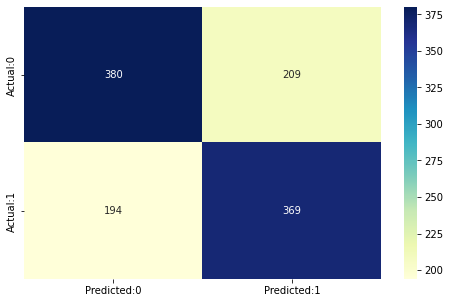

In [47]:
# confusion matrix of Logistic Model
cm=confusion_matrix(Y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [48]:
print(classification_report(Y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65       589
           1       0.64      0.66      0.65       563

    accuracy                           0.65      1152
   macro avg       0.65      0.65      0.65      1152
weighted avg       0.65      0.65      0.65      1152



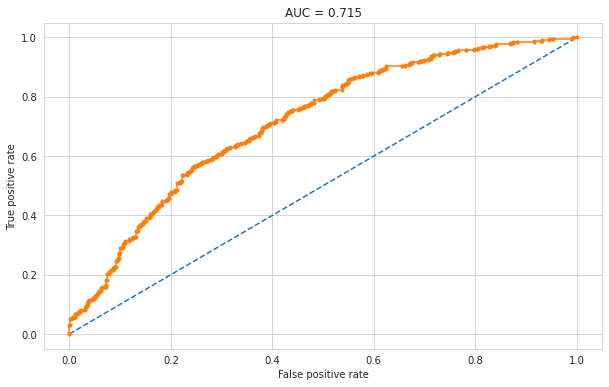

In [49]:
# ROC curve and AUC
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(Y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()


2. **Random Forest**


**Random forests** are a way of averaging multiple deep decision trees, trained on different parts of the same training set, with the goal of reducing the variance. This comes at the expense of a small increase in the bias and some loss of interpretability, but generally greatly boosts the performance in the final model.

In [50]:
# search for optimun parameters using gridsearch
params_rf = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [50, 80, 100]
  }

random_clf = GridSearchCV(RandomForestClassifier(),param_grid=params_rf,cv=10, scoring='roc_auc')

In [51]:
#training the classifier
random_clf.fit(X_train,Y_train)

random_clf.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 80}

In [52]:
#making predictions 
random_predict = random_clf.predict(X_test)

In [53]:
random_accuracy = accuracy_score(Y_test,random_predict)
print(f"Using random forest sion we get an accuracy of {round(random_accuracy*100,2)}%")

Using random forest sion we get an accuracy of 69.01%


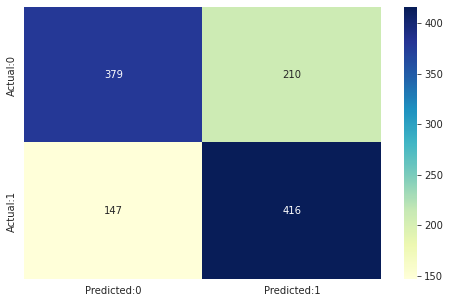

In [54]:
# confusion matrix of Random Forest
cm=confusion_matrix(Y_test,random_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [55]:
print(classification_report(Y_test,random_predict))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68       589
           1       0.66      0.74      0.70       563

    accuracy                           0.69      1152
   macro avg       0.69      0.69      0.69      1152
weighted avg       0.69      0.69      0.69      1152



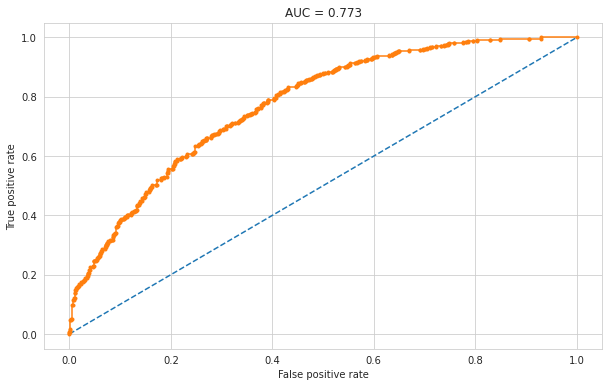

In [56]:
# ROC curve and AUC 
probs1 = random_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
# calculate AUC
ran_auc = roc_auc_score(Y_test, probs1)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs1)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(ran_auc,3)}")
plt.show()

3. **XGBoost**

**XGBoost** stands for eXtreme Gradient Boosting. The name xgboost, though, actually refers to the engineering goal to push the limit of computations resources for boosted tree algorithms

In [57]:
params_xgb = {
    'max_depth': range (2, 12, 1),
    'n_estimators': range(60, 220, 20),
    'learning_rate': [0.1, 0.05, 0.01, 0.005]
  }

xgb_clf = GridSearchCV(XGBClassifier(), param_grid = params_xgb, cv = 10, scoring='roc_auc')

In [58]:
#training the classifier
xgb_clf.fit(X_train,Y_train)

xgb_clf.best_params_

{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 200}

In [59]:
#making predictions 
xgb_predict = xgb_clf.predict(X_test)

In [60]:
xgb_accuracy = accuracy_score(Y_test,xgb_predict)
print(f"Using XG boost we get an accuracy of {round(xgb_accuracy*100,2)}%")

Using XG boost we get an accuracy of 89.06%


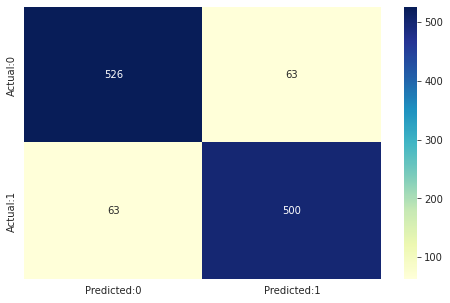

In [61]:
# confusion matrix of XG boost Classifier
cm=confusion_matrix(Y_test,xgb_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [62]:
print(classification_report(Y_test, xgb_predict))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       589
           1       0.89      0.89      0.89       563

    accuracy                           0.89      1152
   macro avg       0.89      0.89      0.89      1152
weighted avg       0.89      0.89      0.89      1152



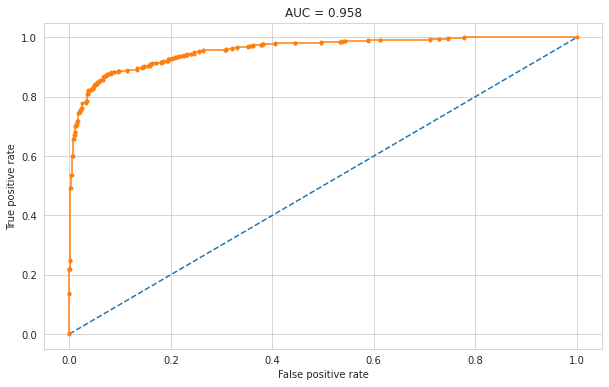

In [63]:
# ROC curve and AUC 
probs2 = xgb_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs2 = probs2[:, 1]
# calculate AUC
xgb_auc = roc_auc_score(Y_test, probs2)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs2)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(xgb_auc,3)}")
plt.show()

4. **Support Vector Machine**

**Support vector machines (SVMs)** are powerful yet flexible supervised machine learning algorithms which are used both for classification and regression. But generally, they are used in classification problems.

An SVM model is basically a representation of different classes in a hyperplane in multidimensional space. The hyperplane will be generated in an iterative manner by SVM so that the error can be minimized. The goal of SVM is to divide the datasets into classes to find a maximum marginal hyperplane (MMH).

In [64]:
# Grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [65]:
#training the classifier
svm_clf.fit(X_train,Y_train)

svm_clf.best_params_

{'C': 10, 'gamma': 1}

In [66]:
#making predictions 
svm_predict = svm_clf.predict(X_test)

In [67]:
svm_accuracy = accuracy_score(Y_test,svm_predict)
print(f"Using Support Vector Machine we get an accuracy of {round(svm_accuracy*100,2)}%")

Using Support Vector Machine we get an accuracy of 66.58%


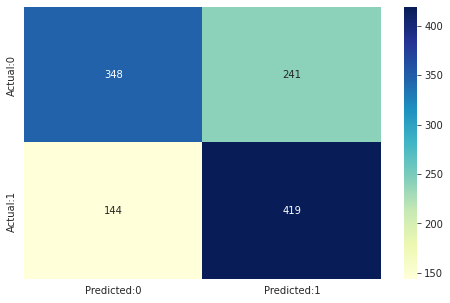

In [68]:
# confusion matrix of XG boost Classifier
cm=confusion_matrix(Y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [69]:
print(classification_report(Y_test, svm_predict))

              precision    recall  f1-score   support

           0       0.71      0.59      0.64       589
           1       0.63      0.74      0.69       563

    accuracy                           0.67      1152
   macro avg       0.67      0.67      0.66      1152
weighted avg       0.67      0.67      0.66      1152



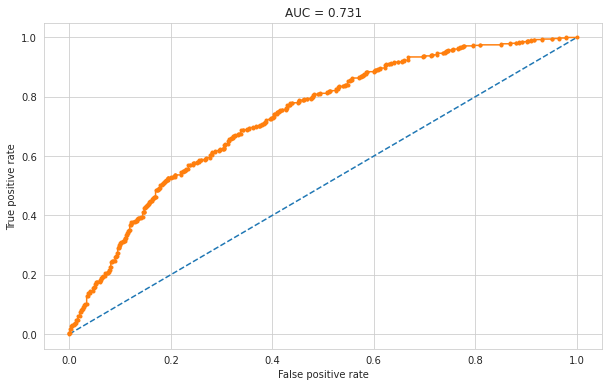

In [70]:
# ROC curve and AUC 
probs3 = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs3 = probs3[:, 1]
# calculate AUC
svc_auc = roc_auc_score(Y_test, probs3)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs3)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svc_auc,3)}")
plt.show()

In [71]:
# Creating dataframe which shows the performance metrics of each model
Performance_table = pd.DataFrame({
    "Logistic regression":{'Test Accuracy':logistic_accuracy.round(2),'Precision': precision_score(Y_test, logistic_predict).round(2),'Recall': recall_score(Y_test, logistic_predict).round(2),'F1 Score': f1_score(Y_test, logistic_predict).round(2), 'AUC':log_auc.round(2)},
    "Random Forest":{'Test Accuracy':random_accuracy.round(2),'Precision': precision_score(Y_test, random_predict).round(2),'Recall': recall_score(Y_test, random_predict).round(2),'F1 Score': f1_score(Y_test, random_predict).round(2), 'AUC':ran_auc.round(2)},
    "XG Boost":{'Test Accuracy':xgb_accuracy.round(2),'Precision': precision_score(Y_test, xgb_predict).round(2),'Recall': recall_score(Y_test, xgb_predict).round(2),'F1 Score': f1_score(Y_test, xgb_predict).round(2), 'AUC':xgb_auc.round(2)},
    "Support vector machine":{'Test Accuracy':svm_accuracy.round(2),'Precision': precision_score(Y_test, svm_predict).round(2),'Recall': recall_score(Y_test, svm_predict).round(2),'F1 Score': f1_score(Y_test, svm_predict).round(2), 'AUC':svc_auc.round(2)}
}).T

In [72]:
Performance_table

,Test Accuracy,Precision,Recall,F1 Score,AUC
Logistic regression,0.65,0.64,0.66,0.65,0.72
Random Forest,0.69,0.66,0.74,0.70,0.77
XG Boost,0.89,0.89,0.89,0.89,0.96
Support vector machine,0.67,0.63,0.74,0.69,0.73


Observation from above table:
* **XG Boost**,  gives highest Accuracy, Recall, Precision and AUC score.


Overall we can say that **XG Boost** is the best model that can be used for the risk prediction of Cardiovasular heart disease.

In [73]:
## Pickle
import pickle

In [75]:
# save model
pickle.dump(xgb_clf, open('XGBmodel.pkl', 'wb'))
 
# load model
cardiovascular_risk_prediction_model = pickle.load(open('XGBmodel.pkl', 'rb'))
 
# predict the output
y_pred = cardiovascular_risk_prediction_model.predict(X_test)
 
# confusion matrix
# print('Confusion matrix of lgbm model: \n',confusion_matrix(y_test, y_pred),'\n')
 
# show the accuracy
# print('Accuracy of lgbm model = ',accuracy_score(y_test, y_pred))